<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Deep-Learning-Tensorflow-Projects/blob/master/Complex_Horse_or_Human_Classification_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the data**

```
Horse or Human Dataset
```



In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-03-17 18:48:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   139MB/s    in 1.0s    

2020-03-17 18:48:05 (139 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-03-17 18:48:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  46.0MB/s    in 0.2s    

2020-03-17 18:48:42 (46.0 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]





```
Extracting the data into /temp folder
```



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()



```
Directories of the data
```



In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_horse_names = os.listdir(train_horse_dir)

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_human_names = os.listdir(train_human_dir)

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_horse_hames = os.listdir(validation_horse_dir)

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
validation_human_names = os.listdir(validation_human_dir)



```
Checking the Number of Images
```



In [6]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128




```
Visualising the data
```



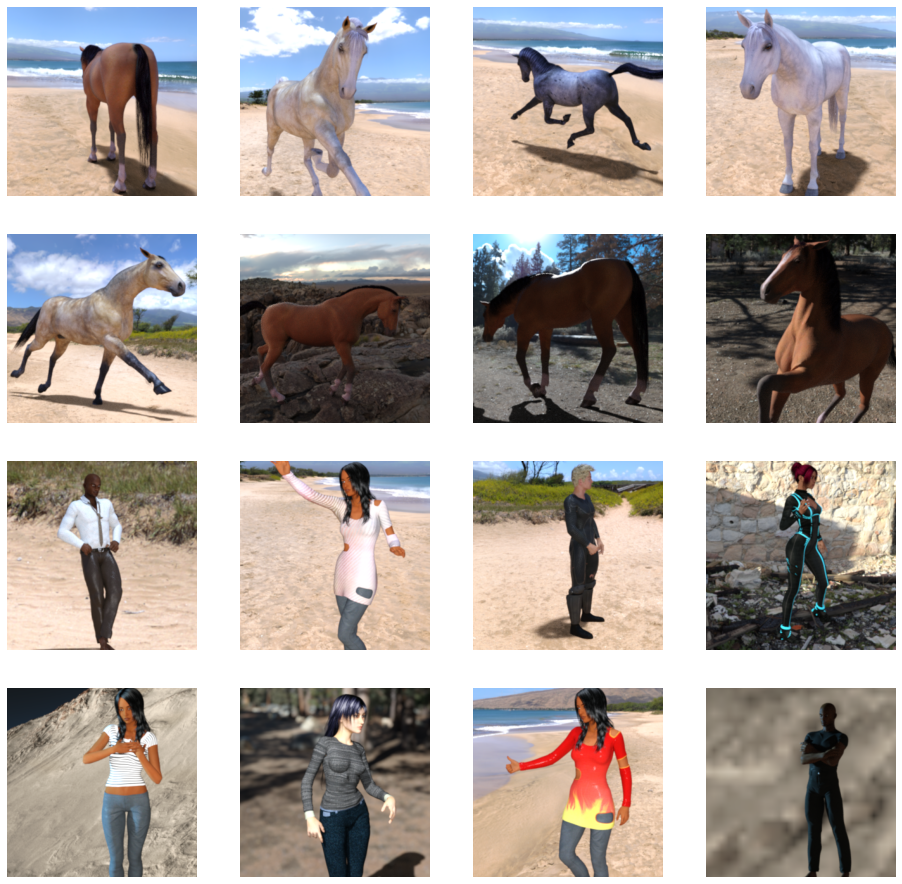

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building the model**

**Importing the libraries**

In [8]:
import tensorflow as tf

**Defining the model**

In [10]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

**Compiling the model**

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Preprocessing using ImageDataGenerator**

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/', # This is the source directory for training images
                                                   target_size=(300, 300), # All images will be resized to 150x150
                                                   batch_size=128, # Since we use binary_crossentropy loss, we need binary labels
                                                   class_mode='binary')

# Flow validation images in batches of 32 using train_datagen generator
validation_generator = train_datagen.flow_from_directory('/tmp/validation-horse-or-human/', # This is the source directory for training images
                                                   target_size=(300, 300), # All images will be resized to 150x150
                                                   batch_size=32, # Since we use binary_crossentropy loss, we need binary labels
                                                   class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Training the model**

In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 87s 11s/step - loss: 0.9912 - acc: 0.5150 - val_loss: 0.6771 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 84s 10s/step - loss: 0.8074 - acc: 0.6296 - val_loss: 0.6320 - val_acc: 0.9023
Epoch 3/15
8/8 [==============================] - 93s 12s/step - loss: 0.5946 - acc: 0.7617 - val_loss: 0.6996 - val_acc: 0.5078
Epoch 4/15
8/8 [==============================] - 74s 9s/step - loss: 0.9485 - acc: 0.7016 - val_loss: 0.4413 - val_acc: 0.7969
Epoch 5/15
8/8 [==============================] - 83s 10s/step - loss: 0.3743 - acc: 0.8521 - val_loss: 0.4289 - val_acc: 0.8672
Epoch 6/15
8/8 [==============================] - 94s 12s/step - loss: 0.3125 - acc: 0.8818 - val_loss: 0.5999 - val_acc: 0.7500
Epoch 7/15
8/8 [==============================] - 84s 10s/step - loss: 0.1874 - acc: 0.9422 - val_loss: 1.2846 - val_acc: 0.7500
Epoch 8/15
8/8 [==============================] - 74s 9s/step - loss: 0.3719 - acc: 0.8863 - val_l

**Prediction**

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Using TensorFlow backend.


Saving Screenshot 2020-03-09 at 12.50.07 AM.png to Screenshot 2020-03-09 at 12.50.07 AM.png
[0.]
Screenshot 2020-03-09 at 12.50.07 AM.png is a horse
